<h3>Heatmaps & Correlations </h3>

<a href="https://github.com/PollyTikhonova/coursework/tree/master/correlation"><img src="https://pollytikhonova.github.io/coursework/GitHub-Mark-32px.png" alt="В репозиторий" title="В репозиторий" style="max-width:100%;  display: inline-block; margin-right: 10px;"></a> <a href="Correlations. R code.ipunb" download target="_blank">Скачать этот ipunb-файл можно здесь</a>

#### Load data & Process

In [1]:
setwd("~/BIO/COURSEWORK/Roytberg/Theme 2/New epoch/correlation")

data = read.csv('../rna-ion-step2/set_minresol_N_5.csv', sep = '\t', skipNul = T)
data = data[,2:362]
data = data[apply(data,1,var)>0,]
data_om = scale(na.omit(data))
correlation.gene = cor(data_om,method = 'spearman')

#### Heatmap

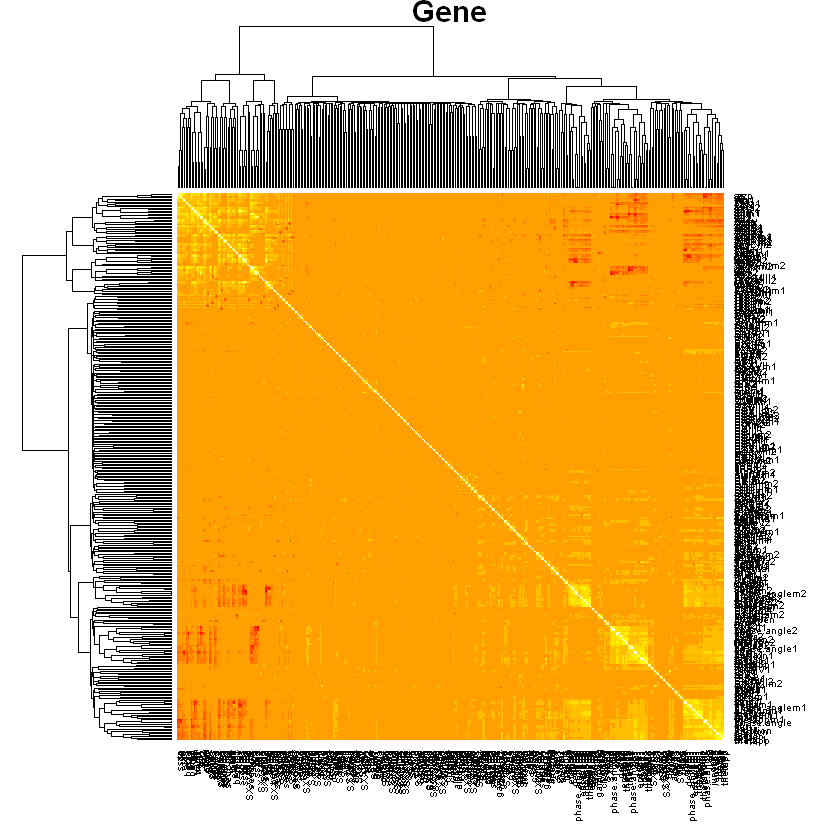

In [12]:
heat = heatmap(correlation.gene,
        symm = TRUE,
        distfun = function(x){as.dist(1-x)},
        main = 'Gene',
        keep.dendro = T)

#### Add color bars to heatmap

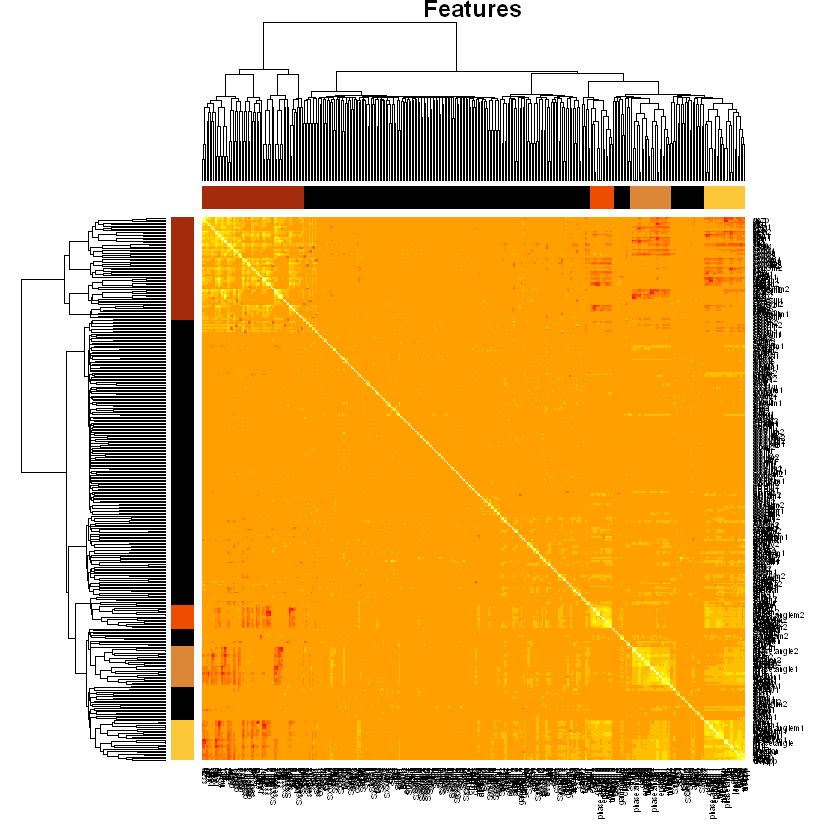

In [13]:
dendro = heat$Rowv
dendro_norm = heat$Colv
rowinds = rev(heat$rowInd)

colors =  c(rep('black', length(labels(dendro))))
color1 = '#fcc639'
color2 = '#dc8738'
color3 = '#ee4c00'
color4 = '#a32b0b'

dendro1 = as.dendrogram(dendro[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]])
a = sapply(rowinds[1:length(labels(dendro1))], function(x){
  colors[x] <<- color1
})


dendro2 = as.dendrogram(dendro[[1]][[1]][[1]][[1]][[2]][[1]][[1]])
start_ind2 = length(labels(as.dendrogram(dendro[[1]][[1]][[1]][[1]][[1]])))
a = sapply(rowinds[start_ind2:(start_ind2+length(labels(dendro2)))], function(x){
  colors[x] <<- color2
})


dendro3 = as.dendrogram(dendro[[1]][[1]][[1]][[2]][[1]][[1]])
start_ind3 = length(labels(as.dendrogram(dendro[[1]][[1]][[1]][[1]])))
a = sapply(rowinds[start_ind3:(start_ind3+length(labels(dendro3)))], function(x){
  colors[x] <<- color3
  
}) 

dendro4 = as.dendrogram(dendro[[2]])
a = sapply(rowinds[(length(labels(dendro))-length(labels(dendro4))):length(labels(dendro))], function(x){
  colors[x] <<- color4
})

heat = heatmap(correlation.gene,
               symm = TRUE,
               distfun = function(x){as.dist(1-x)},
               main = 'Features',
               keep.dendro = T,
               RowSideColors = colors,
               ColSideColors = colors
               )

#### Print Dendrograms

In [2]:
color_branches <- function(n, col)
{
  a <- attributes(n) # Find the attributes of current node
  # Color edges with requested color
  attr(n, "edgePar") <- c(a$edgePar, list(col=col, lwd=2))
  n # Don't forget to return the node!
}

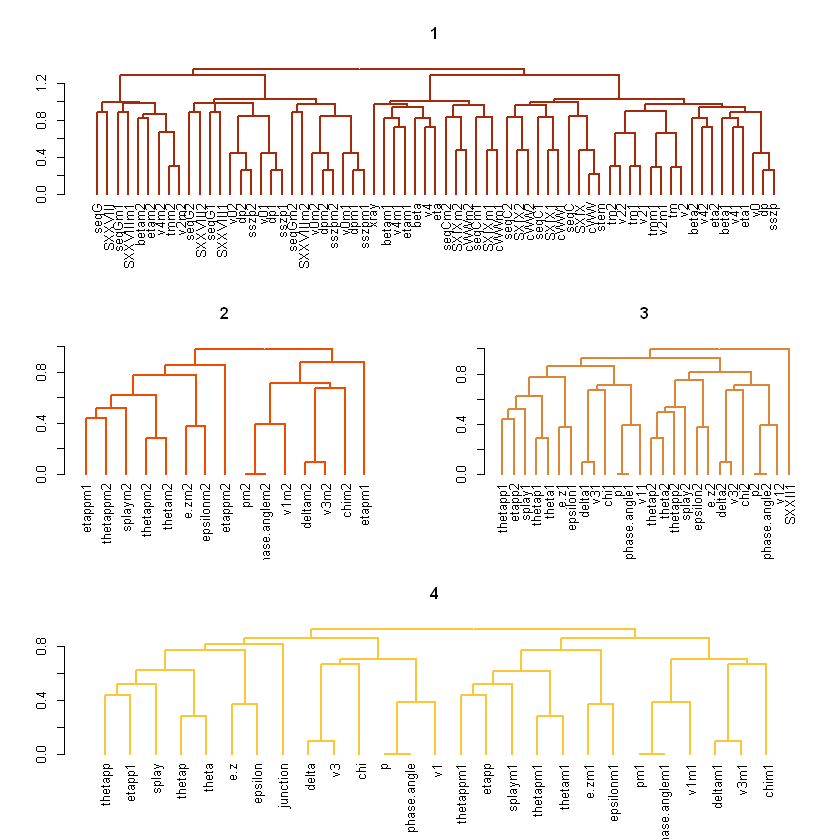

In [15]:
layout(matrix(c(1,2,4,1,3,4),ncol=2))
s = sapply(rev(c(1:4)), function(x){
  plot.colored = paste0('dendro', x,'.colored')
  colour = paste0('color',x)
  dendro_plot = paste0('dendro', x)
  assign(paste0('dendro', x,'.colored'), dendrapply(eval(parse(text=paste0('dendro', x))), color_branches, eval(parse(text=colour))))
  plot(eval(parse(text=plot.colored)), main=5-x)
})

#### Print parts of heatmaps separetely

In [ ]:
# For dendrogram 4
heat1 = heatmap(t(correlation.gene[labels(dendro1),labels(dendro1)]),
                 symm = TRUE,
                 distfun = function(x){as.dist(1-x)},
                 main = 'Heatmap 4',
                Rowv = rev(c(1:length(labels(dendro1)))),
                Colv = "Rowv"
)

# For dendrogram 3
heat2 = heatmap(t(correlation.gene[labels(dendro2),labels(dendro2)]),
                symm = TRUE,
                distfun = function(x){as.dist(1-x)},
                main = 'Heatmap 3',
                Rowv = rev(c(1:length(labels(dendro2)))),
                Colv = "Rowv"
)

# For dendrogram 2
heat3 = heatmap(t(correlation.gene[labels(dendro3),labels(dendro3)]),
                symm = TRUE,
                distfun = function(x){as.dist(1-x)},
                main = 'Heatmap 2',
                Rowv = rev(c(1:length(labels(dendro3)))),
                Colv = "Rowv"
)

# For dendrogram 1
heat4 = heatmap(correlation.gene[labels(dendro4),labels(dendro4)],
                symm = TRUE,
                distfun = function(x){as.dist(1-x)},
                main = 'Heatmap 1',
                Rowv = rev(c(1:length(labels(dendro4)))),
                Colv = "Rowv"
)

# For dendrogram 5
heat5 = heatmap(correlation.gene[labels(dendro1),labels(dendro2)],
             main = 'Heatmap 5',
             Rowv = NA,
             Colv = NA
     
)

# For dendrogram 6
heat6 = heatmap(correlation.gene[labels(dendro1),labels(dendro3)],
                main = 'Heatmap 6',
                Rowv = NA,
                Colv = NA
)

![Heatmaps that were generated by previous cell](images/Plots separately/Heatmaps 1-2-3-4-5-6.png "Heatmaps 1-6")

#### Interactive Heatmap

In [ ]:
library(heatmaply)
heatmaply(correlation.gene, 
          symm = TRUE,
          distfun = function(x){as.dist(1-x)},
          main = 'Gene',
          keep.dendro = T,
          Rowv = dendro_norm,
          Colv = dendro_norm,
          colors = heat.colors(n=256, alpha = 1)
          )

<a href="Correlations Interactive version сlassic.html">You can open this heatmap by this link.</a>

## Heatmaps for angles only

In [ ]:
correlation.gene.angles = cor(data_om[,5:129],method = 'spearman')
heat.angles = heatmap(correlation.gene.angles,
               symm = TRUE,
               distfun = function(x){as.dist(1-x)},
               main = 'Angles',
               keep.dendro = T)
dendro.angles = heat.angles$Rowv
dendro_norm.angles = heat.angles$Colv
rowinds.angles = rev(heat.angles$rowInd)

dendro.angles.1 = dendro.angles[[2]]
dendro.angles.2 = dendro.angles[[1]][[2]]
dendro.angles.3 = dendro.angles[[1]][[1]]

### Colored heatmaps

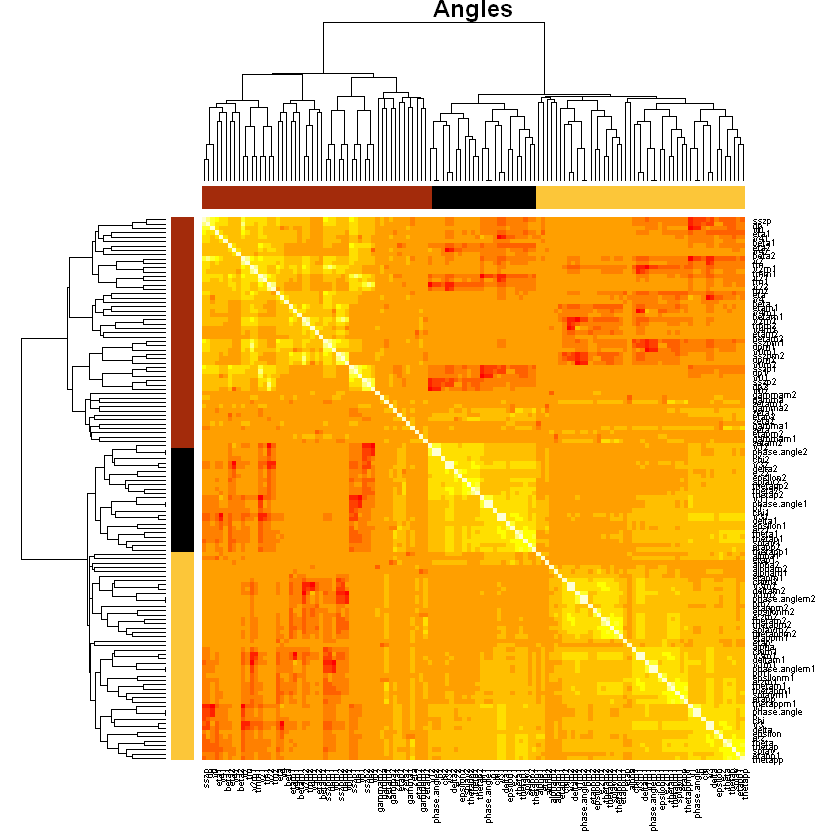

In [7]:
colors.angles =  c(rep('black', length(labels(dendro.angles))))

a = sapply(rowinds.angles[1:length(labels(dendro.angles.3))], function(x){
  colors.angles[x] <<- color1
})

a = sapply(rowinds.angles[(length(rowinds.angles)-length(labels(dendro.angles.1))):length(rowinds.angles)], function(x){
  colors.angles[x] <<- color4
})

heat.angles = heatmap(correlation.gene.angles,
               symm = TRUE,
               distfun = function(x){as.dist(1-x)},
               main = 'Angles',
               keep.dendro = T,
               RowSideColors = colors.angles,
               ColSideColors = colors.angles
)

In [ ]:
heat.angles.1 = heatmap(correlation.gene[labels(dendro.angles.1),labels(dendro.angles.1)],
                symm = TRUE,
                distfun = function(x){as.dist(1-x)},
                main = 'Heatmap 1',
                Rowv = rev(c(1:length(labels(dendro.angles.1)))),
                Colv = "Rowv"
)
heat.angles.2 = heatmap(correlation.gene[labels(dendro.angles.2),labels(dendro.angles.2)],
                       symm = TRUE,
                       distfun = function(x){as.dist(1-x)},
                       main = 'Heatmap 2',
                       Rowv = rev(c(1:length(labels(dendro.angles.2)))),
                       Colv = "Rowv"
)
heat.angles.3 = heatmap(correlation.gene[labels(dendro.angles.3),labels(dendro.angles.3)],
                       symm = TRUE,
                       distfun = function(x){as.dist(1-x)},
                       main = 'Heatmap 3',
                       Rowv = rev(c(1:length(labels(dendro.angles.3)))),
                       Colv = "Rowv"
)

<img src="images/only_angles/allparts.heatmap.angles.png">

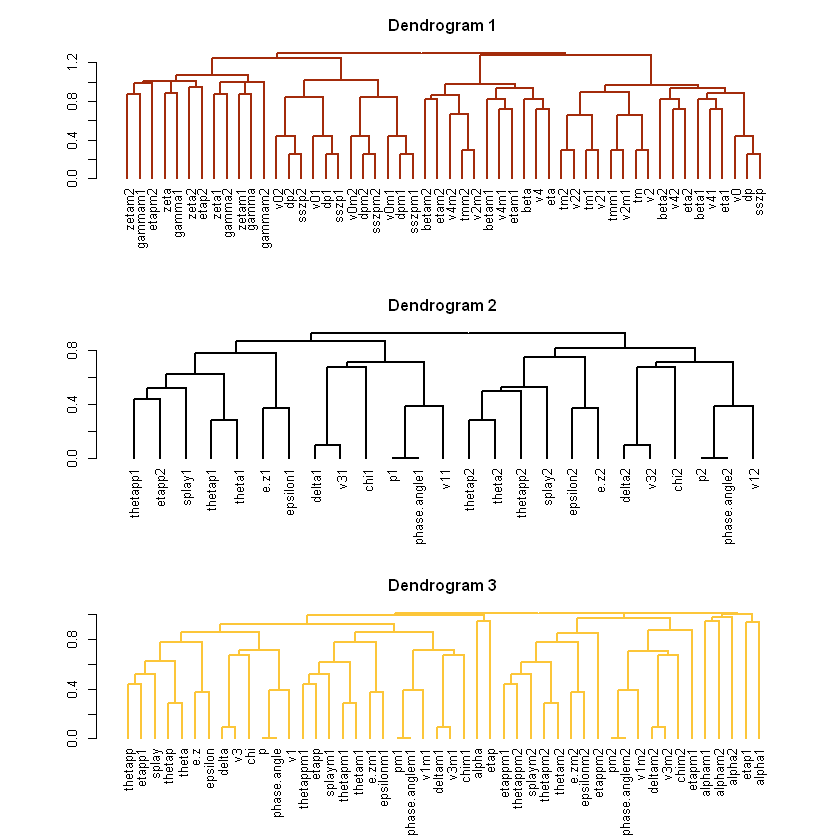

In [5]:
par(mfcol=c(3,1), mai=c(0.8,0.8,0.4,0.4))
plot(dendrapply(dendro.angles.1, color_branches, color4),
     main='Dendrogram 1')
plot(dendrapply(dendro.angles.2, color_branches, 'black'),
     main='Dendrogram 2')
plot(dendrapply(dendro.angles.3, color_branches, color1),
     main='Dendrogram 3')